In [152]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [153]:
data = pd.read_csv('Downloads/Lab-3 Evaluation/Vehicle.csv')

In [154]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [155]:
data.shape

(846, 19)

In [156]:
print(data.isnull().sum())

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


In [157]:
print(data['circularity'].isnull())

0      False
1      False
2      False
3      False
4      False
       ...  
841    False
842    False
843    False
844    False
845    False
Name: circularity, Length: 846, dtype: bool


In [158]:
print(np.mean(data['scaled_radius_of_gyration.1']))

72.44770685579196


In [159]:
print(np.mean(data['skewness_about.2']))

188.91951536643026


In [160]:
print(data['circularity'].isnull().sum())


0


In [161]:
print(data.duplicated().sum())

0


In [162]:
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

In [163]:
print(data['class'])

0      2
1      2
2      1
3      2
4      0
      ..
841    1
842    2
843    1
844    1
845    2
Name: class, Length: 846, dtype: int64


In [164]:
X = data.drop('class', axis = 1).values

In [165]:
print(X)

[[ 95.  48.  83. ...  16. 187. 197.]
 [ 91.  41.  84. ...  14. 189. 199.]
 [104.  50. 106. ...   9. 188. 196.]
 ...
 [106.  54. 101. ...   4. 187. 201.]
 [ 86.  36.  78. ...  25. 190. 195.]
 [ 85.  36.  66. ...  18. 186. 190.]]


In [166]:
X_mean = np.mean(X, axis = 0)
# print(X_mean)
# for i in X_mean:
#     if int(i):
#         print('True')
X_std = np.std(X, axis = 0)
X_centered = X - X_mean
X_normalised = X_centered/X_std
print(X_normalised)

[[ 0.16058035  0.51731039  0.05654549 ...  0.38066565 -0.312191
   0.18395733]
 [-0.32546965 -0.62455555  0.12011183 ...  0.15658888  0.01309006
   0.45297703]
 [ 1.25419283  0.8435578   1.51857129 ... -0.40360306 -0.14955047
   0.04944748]
 ...
 [ 1.49721783  1.49605262  1.20073959 ... -0.96379499 -0.312191
   0.72199673]
 [-0.93303214 -1.44017407 -0.26128621 ...  1.38901113  0.1757306
  -0.08506238]
 [-1.05454464 -1.44017407 -1.02408227 ...  0.60474242 -0.47483153
  -0.75761164]]


In [167]:
# data = data.dropna()

In [168]:
cov_matrix = np.cov(X_normalised.T)
# print(cov_matrix)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues, eigenvectors)

[9.40827475e+00 3.01604079e+00 1.90347973e+00 1.18027045e+00
 9.17176346e-01 5.39283701e-01 3.58568762e-01 2.21663890e-01
 1.60038103e-01 9.17142125e-02 6.65764043e-02 4.59585761e-02
 3.54026269e-02 3.08795059e-03 2.67143688e-02 9.23385254e-03
 1.74443259e-02 2.03729335e-02] [[ 2.75259768e-01  1.27009931e-01  1.19874533e-01 -7.83111799e-02
  -6.93087676e-02  1.44656224e-01  4.53744941e-01  5.64707975e-01
   4.83567441e-01  2.61223250e-01 -4.64595549e-02  1.34347459e-02
  -1.59320528e-01  6.56836364e-03 -5.98487472e-02 -1.62294741e-03
  -6.05339410e-02 -4.67727116e-04]
 [ 2.93390507e-01 -1.26211022e-01  2.51792292e-02 -1.87527168e-01
   8.50217687e-02 -3.00751086e-01 -2.48102890e-01  1.79301557e-01
   1.45527536e-02 -9.75622926e-02 -2.54307562e-03 -1.97637690e-01
  -1.46806354e-02 -7.98474613e-04  3.97051373e-01  7.62143949e-02
  -3.39524526e-01 -5.85712856e-01]
 [ 3.04556734e-01  7.26852631e-02  5.60061584e-02  7.07955589e-02
  -4.07238145e-02 -1.38484464e-01  7.28070584e-02 -4.3604606

In [169]:
index = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[index]
eigenvectors = eigenvectors[:,index]
print("eigenvalues", eigenvalues)
print("eigenvectors", eigenvectors)

eigenvalues [9.40827475e+00 3.01604079e+00 1.90347973e+00 1.18027045e+00
 9.17176346e-01 5.39283701e-01 3.58568762e-01 2.21663890e-01
 1.60038103e-01 9.17142125e-02 6.65764043e-02 4.59585761e-02
 3.54026269e-02 2.67143688e-02 2.03729335e-02 1.74443259e-02
 9.23385254e-03 3.08795059e-03]
eigenvectors [[ 2.75259768e-01  1.27009931e-01  1.19874533e-01 -7.83111799e-02
  -6.93087676e-02  1.44656224e-01  4.53744941e-01  5.64707975e-01
   4.83567441e-01  2.61223250e-01 -4.64595549e-02  1.34347459e-02
  -1.59320528e-01 -5.98487472e-02 -4.67727116e-04 -6.05339410e-02
  -1.62294741e-03  6.56836364e-03]
 [ 2.93390507e-01 -1.26211022e-01  2.51792292e-02 -1.87527168e-01
   8.50217687e-02 -3.00751086e-01 -2.48102890e-01  1.79301557e-01
   1.45527536e-02 -9.75622926e-02 -2.54307562e-03 -1.97637690e-01
  -1.46806354e-02  3.97051373e-01 -5.85712856e-01 -3.39524526e-01
   7.62143949e-02 -7.98474613e-04]
 [ 3.04556734e-01  7.26852631e-02  5.60061584e-02  7.07955589e-02
  -4.07238145e-02 -1.38484464e-01  

In [170]:
k = 2
eigenvalues = eigenvalues[:k]
eigenvectors = eigenvectors[:,:k]
print("eigenvalues", eigenvalues)
print("eigenvectors", eigenvectors)

eigenvalues [9.40827475 3.01604079]
eigenvectors [[ 0.27525977  0.12700993]
 [ 0.29339051 -0.12621102]
 [ 0.30455673  0.07268526]
 [ 0.26759347  0.18963459]
 [ 0.08049351  0.12215894]
 [ 0.09722011 -0.01072835]
 [ 0.31687213 -0.04804872]
 [-0.3140425  -0.012798  ]
 [ 0.31395303 -0.06003572]
 [ 0.28279044 -0.11618353]
 [ 0.30931069 -0.06175533]
 [ 0.31414909 -0.05327723]
 [ 0.27200253 -0.20927995]
 [-0.02091753 -0.488542  ]
 [ 0.04133281  0.05492345]
 [ 0.05833344  0.1241519 ]
 [ 0.0301573   0.54094783]
 [ 0.07408206  0.54028062]]


In [171]:
X_pca = np.dot(X_normalised, eigenvectors)
print(X_pca)

[[ 3.32396019e-01  2.18639943e-01]
 [-1.59373457e+00  4.20549919e-01]
 [ 3.76754122e+00 -1.95045041e-01]
 ...
 [ 4.80781240e+00  1.81592153e-03]
 [-3.29572299e+00  1.00879876e+00]
 [-4.76673122e+00 -3.34686343e-01]]


In [172]:
y = data['class'].values

In [173]:
X_pca.shape

(846, 2)

In [177]:
print(X_pca[:,0].shape)

(846,)


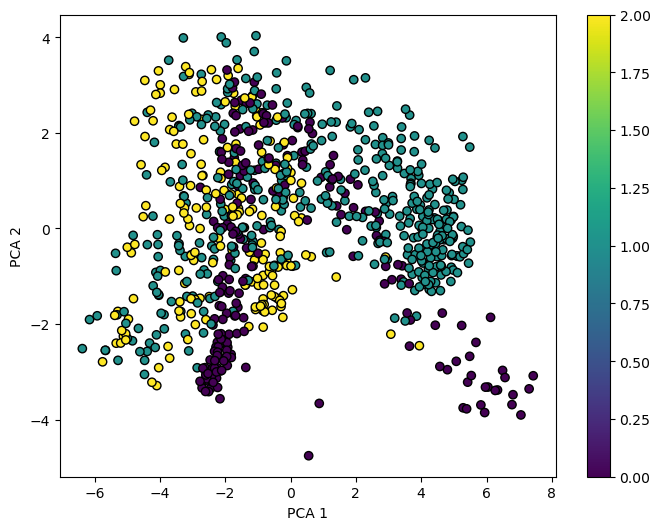

In [179]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c = y, cmap = 'viridis', edgecolor = 'k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter)
plt.show()